# **Projeto Capstone: Fornecendo sugestões baseadas em dados para o RH**

## **Planejamento**

### Informações sobre o conjunto de dados

O conjunto de dados deste projeto contém 15.000 linhas e 10 colunas para as variáveis listadas abaixo. Para obter mais informações sobre os dados, consulte a fonte em [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Objetivo  

Desenvolver um modelo preditivo para estimar a probabilidade de um funcionário deixar a empresa, considerando variáveis como departamento, número de projetos, média de horas mensais, entre outros.  

## Etapa 1. Importação

* Importar pacotes
* Carregar conjunto de dados

### 1. Importar pacotes

In [17]:
# ======================================
# Importações de pacotes operacionais padrão
# ======================================
import numpy as np
import pandas as pd
import pickle  # Para salvar modelos treinados

# ======================================
# Importações de pacotes de visualização
# ======================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# ======================================
# Instalação de Dependências (Opcional)
# ======================================
!pip install xgboost  # Necessário para algoritmos de boosting

# ======================================
# Pacotes para Modelagem de Dados
# ======================================

# --- Pré-processamento e Validação ---
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold
)

# --- Métricas de Avaliação ---
from sklearn import metrics

# --- Algoritmos de Machine Learning ---
# Modelos Ensemble
from sklearn.ensemble import RandomForestClassifier

# XGBoost (Extreme Gradient Boosting)
from xgboost import XGBClassifier, plot_importance

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ------ -------------------------------- 19.7/124.9 MB 112.8 MB/s eta 0:00:01
   ------- -------------------------------- 23.9/124.9 MB 60.3 MB/s eta 0:00:02
   ------------- -------------------------- 43.0/124.9 MB 78.1 MB/s eta 0:00:02
   --------------------- ------------------ 65.8/124.9 MB 79.1 MB/s eta 0:00:01
   ------------------------ --------------- 77.6/124.9 MB 77.3 MB/s eta 0:00:01
   ----------------------------- ---------- 92.3/124.9 MB 74.5 MB/s eta 0:00:01
   ------------------------------------ -- 116.1/124.9 MB 80.6 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 83.0 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 83.0 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 83.0 MB/s eta 0:00:01
   --------------------------------------  124.8/124.9 MB 83.0 MB/s eta 0:00:01
   --------------------------------------  124.8/

### 2. Carregar conjunto de dados

Leia o conjunto de dados chamado **`HR_capstone_dataset.csv`.** 

In [2]:
# Carregar o conjunto de dados em um dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Exibir as primeiras linhas do dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Etapa 2. Exploração de dados (EDA inicial e limpeza de dados)

- Entendendo as variáveis
- Limpando o conjunto de dados (dados ausentes, dados redundantes, outliers)

### 1. Reunir informações sobre os dados

In [3]:
# Informações básicas
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Estatísticas descritivas para dados numéricos
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Estatísticas descritivas para dados categóricos
df0.describe(include=['object'])

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### 2. Renomear colunas

Renomeando as colunas conforme necessário, padronizando os nomes no formato snake_case, corrigindo erros de ortografia e tornando-os mais concisos quando aplicável.

In [6]:
# Exibir todos os nomes de colunas
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Renomeando as colunas
df0 = df0.rename(columns={
    'number_project': 'number_of_projects',
    'time_spend_company': 'tenure',
    'left': 'employee_left',
    'Department': 'department',
    'Work_accident': 'work_accident',
    'average_montly_hours':'average_monthly_hours'
})

# Exibindo os nomes atualizados das colunas
print("Colunas atualizadas:")
print(df0.columns.tolist())

Colunas atualizadas:
['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'tenure', 'work_accident', 'employee_left', 'promotion_last_5years', 'department', 'salary']


**Explicação das mudanças:**  
- **`number_of_projects`:** Adiciona preposição para clareza.  
- **`tenure`:** Substitui "time_spend_company" por um termo conciso que indica tempo de permanência na empresa.  
- **`employee_left`:** Torna explícito que a coluna se refere ao status de saída do funcionário.  
- **`department` e `work_accident`:** Colocando o texto em caixa baixa.  
- **`average_monthly_hours`:** Corrigindo erros ortográficos. 

### 3. Valores ausentes

Verificando se há valores ausentes nos dados.

In [8]:
# Contar valores nulos em cada coluna
null_count_per_column = df0.isnull().sum()

# Contar o total de valores nulos em todo o DataFrame
total_null_count = df0.isnull().sum().sum()

print(null_count_per_column)
print()
print("Total de valores nulos no DataFrame:", total_null_count)

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
employee_left            0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Total de valores nulos no DataFrame: 0


### 4. Verificar duplicatas

Verificando se há entradas duplicadas nos dados.

In [9]:
# Checando por duplicatas
colunas_avaliacao = ['satisfaction_level', 'last_evaluation', 'number_of_projects', 
                     'average_monthly_hours', 'tenure', 'work_accident', 
                     'employee_left', 'promotion_last_5years', 'department', 'salary']

duplicates = df0[df0.duplicated(subset=colunas_avaliacao, keep=False)]

print(f"Número de linhas com dados duplicadas: {len(duplicates)}")

Número de linhas com dados duplicadas: 5346


In [10]:
# Inspecionar algumas linhas
duplicates_sorted = duplicates.sort_values(by=colunas_avaliacao)
duplicates_sorted.head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,employee_left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


In [11]:
# Eliminando as duplicatas e salvando o dataframe resultante
df0 = df0.drop_duplicates(subset=colunas_avaliacao, keep='first')

In [12]:
# Verificação de duplicatas
colunas_avaliacao = ['satisfaction_level', 'last_evaluation', 'number_of_projects', 
                     'average_monthly_hours', 'tenure', 'work_accident', 
                     'employee_left', 'promotion_last_5years', 'department', 'salary']

duplicates = df0[df0.duplicated(subset=colunas_avaliacao, keep=False)]

print(f"Número de linhas com dados duplicadas: {len(duplicates)}")

Número de linhas com dados duplicadas: 0


### 5. Verificar outliers

Verificando se há valores discrepantes nos dados.

In [13]:
# Estatísticas descritivas para dados numéricos
df0.describe()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,employee_left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Colunas com Potenciais Outliers**  
- **`average_monthly_hours` (média de horas mensais):**  
  - **Mínimo:** 96 horas (~24 horas/semana)  
  - **Máximo:** 310 horas (~77 horas/semana)  
  - **Análise:** Valores extremamente baixos e altos em comparação à média (200,47 horas).  
  - **Ação ideal:** Verificar se:  
    - Funcionários com 96 horas estão em regime de meio período (não declarado nos dados).  
    - Funcionários com 310 horas representam sobrecarga extrema ou erro de registro.  

- **`tenure` (tempo na empresa):**  
  - **Máximo:** 10 anos  
  - **Média:** 3,36 anos | **75%:** 4 anos  
  - **Análise:** Funcionários com 10 anos são raros (apenas 25% ultrapassam 4 anos).  
  - **Ação ideal:** Validar se esses casos são reais (e.g., funcionários seniores).  


**Colunas Sem Outliers Evidentes**  
- **`satisfaction_level` (nível de satisfação):**  
  - Variação entre 0,09 e 1,0, mas distribuída de forma plausível (média 0,63).  

- **`number_of_projects` (número de projetos):**  
  - Intervalo de 2 a 7 projetos, com mediana em 4. Valores condizem com cargas de trabalho típicas.  

- **Variáveis Binárias (`work_accident`, `employee_left`, `promotion_last_5years`):**  
  - Todas variam entre 0 e 1, conforme esperado.  

---

**Considerações Gerais**  
  - Plotar histogramas ou boxplots para `average_monthly_hours` e `tenure` para visualizar distribuição.  
  - Cruzar `average_monthly_hours` com `employee_left` para ver se horas extremas correlacionam-se com rotatividade.  

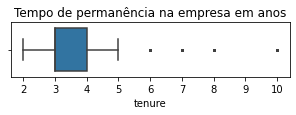

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['tenure'], fliersize=1)
plt.title('Tempo de permanência na empresa em anos');

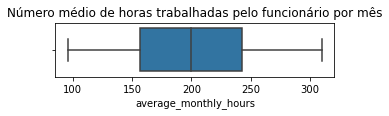

In [15]:
# Create a boxplot to visualize distribution of `average_monthly_hours`
plt.figure(figsize=(5,1))
sns.boxplot(x=df0['average_monthly_hours'], fliersize=1)
plt.title('Número médio de horas trabalhadas pelo funcionário por mês');

In [16]:
# Determine the number of rows containing outliers
print("Contagem absoluta:")
print(df0['tenure'].value_counts())
print("\nPorcentagem:")
print(df0['tenure'].value_counts(normalize=True) * 100)

Contagem absoluta:
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: tenure, dtype: int64

Porcentagem:
3     43.282462
2     24.268201
4     16.720874
5      8.856642
6      4.520057
10     0.892336
7      0.783921
8      0.675507
Name: tenure, dtype: float64


---
#### Filtrar o DataFrame para tenure

In [17]:
# Tenure de 10 anos, agrupar por promotion_last_5years:
df0[df0['tenure'] == 10].groupby('promotion_last_5years')['tenure'].sum()

promotion_last_5years
0    990
1     80
Name: tenure, dtype: int64

In [18]:
# Tenure de 8 anos, agrupar por promotion_last_5years:
df0[df0['tenure'] == 8].groupby('promotion_last_5years')['tenure'].sum()

promotion_last_5years
0    608
1     40
Name: tenure, dtype: int64

In [19]:
# Tenure de 7 anos, agrupar por promotion_last_5years:
df0[df0['tenure'] == 7].groupby('promotion_last_5years')['tenure'].sum()

promotion_last_5years
0    532
1    126
Name: tenure, dtype: int64

**Contexto dos Dados**  
Os funcionários com **7, 8 e 10 anos de empresa** apresentam:  
- **Baixíssima taxa de promoção nos últimos 5 anos** (ex: apenas 80 promoções em 10 anos de *tenure*).  
- **Representam menos de 3% do total de dados** (107 + 94 + 81 = 282 registros).  

Isso sugere que:  
- São casos atípicos (*outliers*) ou indicam problemas estruturais (e.g., estagnação de carreira).  
- Podem ser funcionários em cargos especializados sem necessidade de promoção ou em situações específicas não capturadas nos dados.  

**Conclusão**  
Não irei remover os outliers ainda: 
  - A quantidade é pequena (<3%), e modelos de ensemble podem gerenciá-los.  
  - Eles podem representar cenários reais de estagnação que impactam a rotatividade.  

# Analise

## Etapa 2. Exploração de dados

### 6. Análise de variáveis

In [20]:
df0.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,employee_left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


---
### Porcentagens de employee_left

Primeiro entender  quantos funcionários saíram e qual porcentagem de todos os funcionários esse número representa.

In [21]:
# Get numbers of people who left vs. stayed
print("Contagem absoluta:")
print(df0['employee_left'].value_counts())

# Get percentages of people who left vs. stayed
print("\nPorcentagem:")
print(round(df0['employee_left'].value_counts(normalize=True) * 100),2)


Contagem absoluta:
0    10000
1     1991
Name: employee_left, dtype: int64

Porcentagem:
0    83.0
1    17.0
Name: employee_left, dtype: float64 2


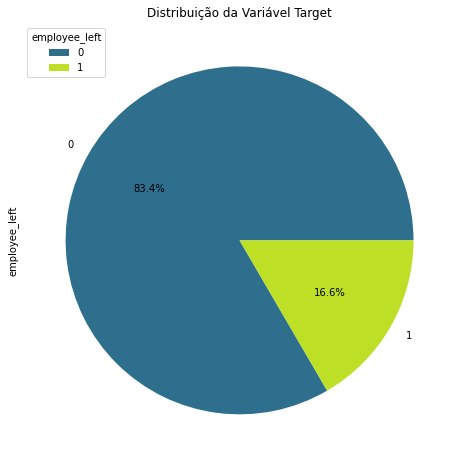

In [22]:
# Gráfico da distribuição da Variável Target

# Definindo cores personalizadas para as fatias
colors = ['#2e6f8e', '#bddf26'] 

# Gráfico de pizza
plt.figure(figsize=(8, 8))
df0['employee_left'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

# Adicionando título e legenda
plt.title('Distribuição da Variável Target')
plt.legend(title='employee_left', loc='upper left')

plt.show()

Esse é um conjunto de dados desequilibrado, mas não extremamente. 

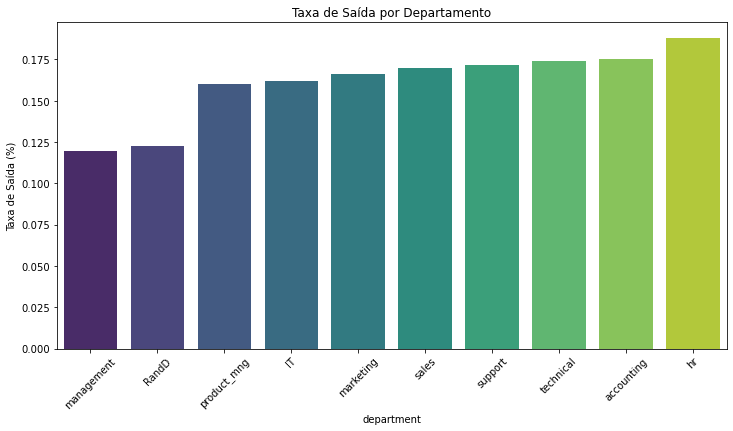

In [23]:
# Calcular a taxa de saída por departamento
exit_rates = df0.groupby('department')['employee_left'].mean().sort_values()

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=exit_rates.index, y=exit_rates.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Taxa de Saída (%)')
plt.title('Taxa de Saída por Departamento')

plt.show()

---
### Tenure

Checando o tempo de funcionarios na companhia em relação a algumas matricas.

#### vs. Department

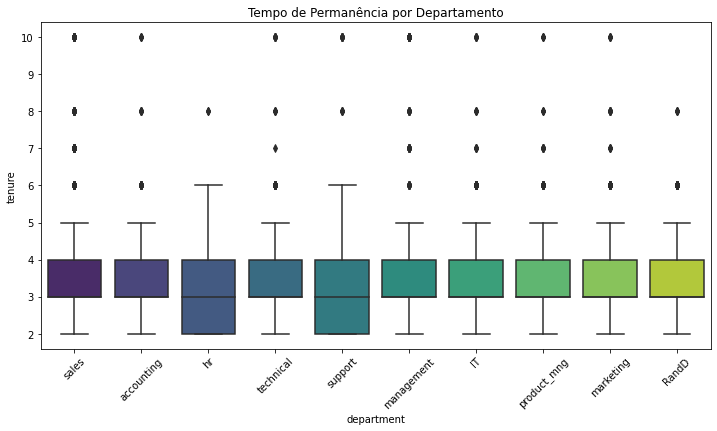

In [24]:
# Distribuição de tenure por departamento
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='tenure', data=df0, palette='viridis')
plt.xticks(rotation=45)
plt.title('Tempo de Permanência por Departamento')
plt.show()

**Padrão de Outliers em Todos os Departamentos:**  
   - O gráfico mostra que cada departamento tem funcionários com tempos de permanência que são considerados outliers (pontos acima dos limites do boxplot).  
   - Isso pode indicar que há um pequeno grupo de funcionários que ficam muito mais tempo na empresa do que a maioria, o que pode estar relacionado a cargos de liderança ou funções especializadas.

**HR e Support com Padrão Diferente**  
   - Comparando com os outros departamentos, HR e Support parecem ter medianas ligeiramente menores e distribuições diferentes. Possíveis razões:  
     - Esses departamentos podem ter maior rotatividade de funcionários.    
     - O trabalho nessas áreas pode envolver mais posições de entrada (entry-level), o que significa que funcionários tendem a mudar de função ou sair da empresa mais rapidamente.

#### vs. Satisfaction

O gráfico de linha mostra a variação da satisfação ao longo do tempo de permanência.

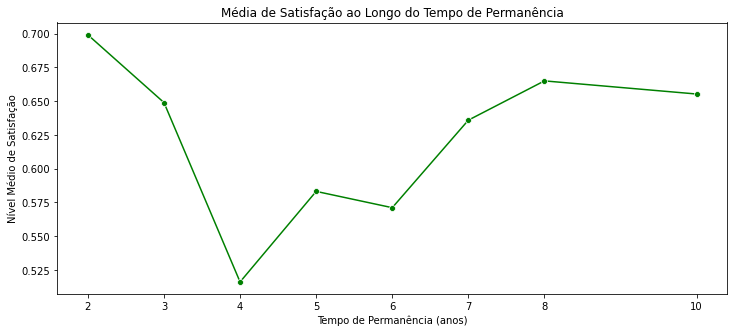

In [25]:
# Agrupar por tempo de permanência e calcular a média de satisfação
df_avg = df0.groupby('tenure')['satisfaction_level'].mean().reset_index()

# Criar gráfico de linha
plt.figure(figsize=(12, 5))
sns.lineplot(x='tenure', y='satisfaction_level', data=df_avg, marker='o', color='g')

# Configurações do gráfico
plt.title('Média de Satisfação ao Longo do Tempo de Permanência')
plt.xlabel('Tempo de Permanência (anos)')
plt.ylabel('Nível Médio de Satisfação')
plt.xticks(df_avg['tenure'])  # Garantir que os rótulos do eixo X correspondam aos anos disponíveis

plt.show()

#### vs. Salary

Analisando a diferença salarial entre os funcionários com diferentes tempo na empresa.

In [26]:
# Porcentagem de cada categoria salarial por tempo de empresa
cross_tab = pd.crosstab(df0['tenure'], df0['salary'], normalize='index') * 100
cross_tab = cross_tab.round(2)  # Arredonda os valores
cross_tab.style.format("{:.2f}").background_gradient(cmap='Greens')  # Formata para exibição correta

salary,high,low,medium
tenure,,,
2,8.87,47.22,43.92
3,8.07,48.54,43.39
4,7.48,49.18,43.34
5,5.37,51.79,42.84
6,8.49,43.36,48.15
7,20.21,19.15,60.64
8,11.11,37.04,51.85
10,29.91,26.17,43.93


- Funcionários com **5 anos** de empresa têm a **média mais baixa de satisfação** (0.55).  
- A proporção de salários **baixos** aumenta progressivamente entre 2 e 5 anos.  
- Apenas ~5-8% dos funcionários nessa faixa recebem salários altos.  

**Correlação:**
- Funcionários com **2-5 anos** de empresa:  
  - **Salários baixos predominam** (47-52%).  
  - **Satisfação cai drasticamente** (de 0.65 para 0.55).  

Isso sugere que a **estagnação salarial** é um fator-chave para a insatisfação e possível rotatividade.  

---
### Department

#### vs. Satisfaction

O gráfico de linha mostra a variação da satisfação por departamento.

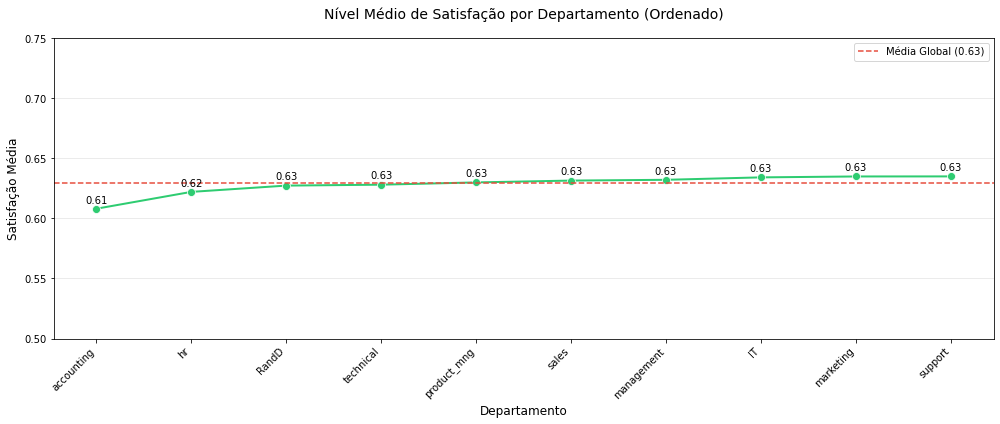

In [27]:
plt.figure(figsize=(14, 6))

# Calcular médias por departamento e ordenar
department_satisfaction = df0.groupby('department')['satisfaction_level'].mean().sort_values()

# Criar gráfico de linha
sns.lineplot(x=department_satisfaction.index, 
             y=department_satisfaction.values, 
             marker='o',
             markersize=8,
             linewidth=2,
             color='#2ecc71')

# Linha de referência da média global
plt.axhline(y=df0['satisfaction_level'].mean(), 
            color='#e74c3c', 
            linestyle='--', 
            label=f'Média Global ({df0["satisfaction_level"].mean():.2f})')

# Personalização
plt.title('Nível Médio de Satisfação por Departamento (Ordenado)', fontsize=14, pad=20)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Satisfação Média', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 0.75)  # Foco na variação relevante
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Adicionar valores nos pontos
for x, y in zip(department_satisfaction.index, department_satisfaction.values):
    plt.text(x, y+0.005, f'{y:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

A satisfação parece relativamente uniforme entre os departamentos.

#### vs. Salary

In [28]:
# Porcentagem de cada categoria salarial por departamento
cross_tab = pd.crosstab(df0['department'], df0['salary'], normalize='index') * 100
cross_tab = cross_tab.round(2)  # Arredonda os valores
cross_tab.style.format("{:.2f}").background_gradient(cmap='Greens')  # Formata para exibição correta

salary,high,low,medium
department,,,
IT,7.27,48.77,43.95
RandD,6.77,46.40,46.83
accounting,10.14,47.67,42.19
hr,6.32,49.25,44.43
management,29.36,31.88,38.76
marketing,9.21,46.06,44.73
product_mng,7.58,50.00,42.42
sales,7.32,47.95,44.74
support,6.92,47.61,45.47


#### vs. Average monthly hours

In [29]:
# Calcular médias e ordenar departamentos
resultado = (df0.groupby('department')['average_monthly_hours']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .round(3)
)
resultado.columns = ['Departamentos', 'Média de horas mensais']
print(resultado)

  Departamentos  Média de horas mensais
0    management                 201.530
1         RandD                 201.291
2     technical                 201.115
3    accounting                 200.878
4            IT                 200.638
5       support                 200.627
6         sales                 200.242
7     marketing                 199.487
8            hr                 199.371
9   product_mng                 198.894


A relativa uniformidade entre as variáveis `average_monthly_hours`, `salary` e `satisfaction_level` sugere que os fatores críticos para a rotatividade vão além das diferenças entre departamentos.

---
### Satisfaction Level 

#### vs. Average Monthly Hours

Identificar se funcionários sobrecarregados têm menor satisfação.

In [30]:
# Criar categoria de carga de trabalho
df0['workload'] = pd.cut(df0['average_monthly_hours'], 
                         bins=[0, 160, 240, 310], 
                         labels=['leve', 'moderada', 'intensa'])

# Média de satisfação por carga de trabalho
media_arredondada = round(df0.groupby('workload')['satisfaction_level'].mean(), 2)
print(media_arredondada)

workload
leve        0.59
moderada    0.68
intensa     0.60
Name: satisfaction_level, dtype: float64


**Contexto dos Dados:**
- Funcionários com carga moderada são os mais satisfeitos  
- A satisfação média de quem trabalha muitas horas (0.60) é quase a mesma de quem trabalha pouco (0.59). Isso pode indicar que outros fatores têm mais impacto na satisfação do que o número de horas trabalhadas.  

#### vs. Salary


In [31]:
# Média de satisfação por nível salarial
df0.groupby('salary')['satisfaction_level'].mean().round(2)


salary
high      0.64
low       0.62
medium    0.63
Name: satisfaction_level, dtype: float64

A média pode esconder variações importantes dentro de cada grupo. Esses valores são muito próximos, sugerindo que uma variavel sozinha pode não ser um fator determinante para a satisfação.

Um boxplot pode ajudar a visualizar a dispersão dos valores de satisfação para cada categoria de salário:

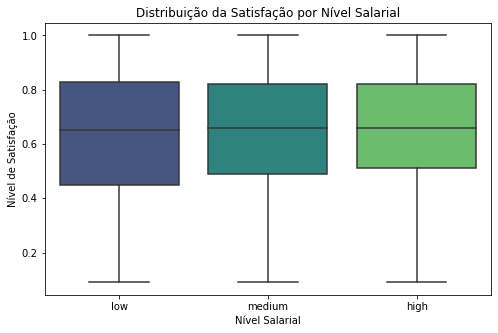

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='salary', y='satisfaction_level', data=df0, palette='viridis')

# Configurações do gráfico
plt.title('Distribuição da Satisfação por Nível Salarial')
plt.xlabel('Nível Salarial')
plt.ylabel('Nível de Satisfação')

plt.show()


- **Distribuição relativamente estável** – Não há uma tendência clara indicando que funcionários com maior satisfação (próximos de 1.0) tenham uma distribuição salarial diferente daqueles com baixa satisfação (próximos de 0.1).  

O salário por si só não parece ser um grande fator determinante para a satisfação dos funcionários. Outros elementos podem ter um impacto maior. Isso sugere que políticas de retenção não devem focar apenas em aumentos salariais, mas também em outros fatores que influenciam o bem-estar dos funcionários.

 ---
### Number of Projects 

#### vs. Last Evaluation

Verificar se mais projetos correlacionam-se com avaliações melhores.

In [33]:
# Código ajustado para melhor clareza
resultado = (
    df0.groupby('number_of_projects')['last_evaluation']
    .mean()
    .reset_index()
    .round(3)
)
resultado.columns = ['Número de Projetos', 'Avaliação Média']
print(resultado)

   Número de Projetos  Avaliação Média
0                   2            0.585
1                   3            0.717
2                   4            0.736
3                   5            0.750
4                   6            0.766
5                   7            0.864


- Há uma **correlação positiva** entre o `number_of_projects` e a `last_evaluation`. Funcionários com mais projetos (7) têm avaliações **82% mais altas** que aqueles com 2 projetos. 

#### vs. Average monthly hours

In [34]:
resultado = (
    df0.groupby('number_of_projects')['average_monthly_hours']
    .sum()
    .reset_index()
    .round(3)
)
resultado.columns = ['Número de Projetos', 'Horas mensais']
print(resultado)

   Número de Projetos  Horas mensais
0                   2         260733
1                   3         694629
2                   4         751270
3                   5         466977
4                   6         190304
5                   7          39965


- Quanto mais projetos, maior a carga horária individual.

- Funcionários com 7 projetos trabalham, em média, 275h/mês (equivalente a ~69h/semana).

In [35]:
resultado = (
    df0.groupby('number_of_projects')['average_monthly_hours']
    .mean()
    .reset_index()
    .round(3)
)
resultado.columns = ['Número de Projetos', 'Horas mensais']
print(resultado)

   Número de Projetos  Horas mensais
0                   2        164.812
1                   3        197.338
2                   4        203.872
3                   5        209.125
4                   6        230.392
5                   7        275.621


- Pico em 3-4 projetos, representam a maior parcela da carga total de trabalho.

- Poucos funcionários estão alocados em 6-7 projetos.

#### Correlação com Satisfação e Rotatividade 

É provável que a taxa de saída seja maior para quem tem mais projetos.  

In [36]:
df0.groupby('number_of_projects')['employee_left'].mean()  

number_of_projects
2    0.541719
3    0.010795
4    0.064315
5    0.153605
6    0.449153
7    1.000000
Name: employee_left, dtype: float64

| **Nº de Projetos** | **Taxa de Rotatividade** | **Interpretação** |  
|---------------------|---------------------------|-------------------|  
| **2**               | 54.2%                    | Funcionários com poucos projetos têm alta probabilidade de sair. |  
| **3**               | 1.1%                     | Rotatividade mínima: equilíbrio ideal de carga. |  
| **4**               | 6.4%                     | Aumento leve, mas ainda dentro de uma faixa sustentável. |  
| **5**               | 15.4%                    | Rotatividade cresce, mas permanece abaixo da média geral (16.6%). |  
| **6**               | 44.9%                    | Rotatividade elevada: sinal de sobrecarga ou estresse. |  
| **7**               | 100%                     | **Todos os funcionários com 7 projetos deixaram a empresa.** |  

In [37]:
df0.groupby('number_of_projects')['satisfaction_level'].mean()  

number_of_projects
2    0.499071
3    0.689418
4    0.694280
5    0.671155
6    0.314673
7    0.116690
Name: satisfaction_level, dtype: float64

 
| **Nº de Projetos** | **Satisfação Média** | **Interpretação**                                                                 |
|---------------------|-----------------------|-----------------------------------------------------------------------------------|
| **2**               | 0.50                 | **Subutilização:** Funcionários podem sentir falta de desafios ou crescimento.    |
| **3**               | 0.69                 | **Ponto ideal:** Equilíbrio entre produtividade e bem-estar.                      |
| **4**               | 0.69                 | **Zona de conforto:** Mantém alta satisfação, similar a 3 projetos.               |
| **5**               | 0.67                 | **Leve declínio:** Aumento de carga começa a impactar, mas ainda tolerável.       |
| **6**               | 0.31                 | **Sobrecarga crítica:** Queda drástica na satisfação.  |
| **7**               | 0.12                 | **Insustentável:** Satisfação quase nula. |


- **Funcionários com carga de trabalho excessiva enfrentam alto risco de saída** – A taxa de desligamento **salta para 44,9%** quando um funcionário tem **6 projetos** e atinge **100% para aqueles com 7 projetos**. Paralelamente, a satisfação despenca drasticamente (**0.31 para 6 projetos e 0.12 para 7 projetos**), evidenciando que sobrecarregar funcionários leva à insatisfação extrema e alta rotatividade.  

- **Funcionários com poucos projetos (2) têm alta taxa de saída** – A taxa de saída para funcionários com apenas 2 projetos é **54,2%**, muito maior do que para aqueles com 3, 4 ou 5 projetos. Além disso, a satisfação média desses funcionários é **0.50**, a mais baixa entre os grupos com carga moderada de projetos. Isso sugere que ter poucos projetos pode levar à desmotivação e ao desligamento da empresa.  
 
- **Funcionários com carga de trabalho moderada (3 a 5 projetos) apresentam maior estabilidade** – A taxa de saída é consideravelmente menor, **variando entre 1% e 15%**, e a satisfação média se mantém alta, entre **0.67 e 0.69**. Esses números indicam que essa faixa de carga de trabalho parece ser ideal, equilibrando desafios e bem-estar.  

Para reduzir a taxa de saída, a empresa deve evitar **extremos na distribuição de projetos**. Funcionários com poucos projetos podem se sentir desmotivados, enquanto aqueles com excesso de trabalho enfrentam estresse e exaustão. A faixa ideal parece estar entre **3 e 5 projetos**, onde a satisfação é maior e a retenção mais estável.


#### vs Tenure

In [38]:
cross_tab = pd.crosstab(df0['tenure'], df0['number_of_projects'], normalize='index') * 100
cross_tab = cross_tab.round(2)  # Arredonda os valores
cross_tab.style.format("{:.2f}").background_gradient(cmap='Greens')  # Formata para exibição correta

number_of_projects,2,3,4,5,6,7
tenure,,,,,,
2,6.87,38.93,35.02,17.22,1.92,0.03
3,21.75,30.39,30.64,14.84,2.33,0.06
4,5.94,23.69,25.09,18.65,20.65,5.99
5,6.21,11.02,30.70,36.25,13.84,1.98
6,9.04,20.48,28.41,28.78,13.28,0.00
7,8.51,30.85,34.04,20.21,6.38,0.00
8,7.41,38.27,28.40,20.99,4.94,0.00
10,4.67,43.93,35.51,10.28,5.61,0.00


**Dinâmica de Alocação de Projetos**  

- **Funcionários juniores (tenure = 2-3):** Recebem projetos gradualmente, mas a subutilização (2 projetos) já é um risco inicial.  
<br>  
- **Funcionários intermediários (tenure = 4-5):** São sobrecarregados com mais projetos, levando a picos de insatisfação e rotatividade.  
<br>  
- **Funcionários seniores (tenure = 6+):** Distribuição mais estável, mas ainda há casos de sobrecarga (5-6 projetos).

### Observações:

**O que foi observado sobre as relações entre as variáveis?**  
A principal relação identificada foi entre o número de projetos e a rotatividade dos funcionários. Funcionários com **2 projetos** apresentaram alta taxa de saída por possível desmotivação, enquanto aqueles com **6 ou mais projetos** tiveram alta saída devido à sobrecarga. Além disso, a satisfação dos funcionários diminui significativamente conforme a carga de trabalho se torna extrema (muito baixa ou muito alta). O salário, por outro lado, não mostrou forte correlação com a satisfação.  

**O que foi observado sobre as distribuições nos dados?**  
A distribuição de tenure mostrou que a maior parte dos funcionários permanece por **2 a 5 anos**, sendo que a rotatividade ocorre de forma mais acentuada em extremos de carga de trabalho e número de projetos. A satisfação média dos funcionários está relativamente equilibrada entre categorias salariais, e a distribuição de **average_monthly_hours** indica que a maioria tem carga moderada, com poucos casos de sobrecarga extrema.  

**Quais recursos forma utilizados essa etapa?**  
Utilizei principalmente **estatísticas descritivas, visualizações de dados** (boxplots, tabelas cruzadas) e manipulação de dados com **Pandas e Seaborn**. Além disso, referências sobre boas práticas de EDA ajudaram a direcionar as análises mais relevantes.  

**Há considerações éticas nesta etapa?**  
Sim, algumas questões éticas incluem:  
- **Privacidade dos funcionários**, garantindo que a análise não exponha indivíduos específicos.  
- **Viés nos dados**, que pode levar a conclusões erradas se certas variáveis forem interpretadas de forma simplista (por exemplo, assumir que projetos a mais sempre levam ao sucesso sem considerar outros fatores).  
- **Uso responsável dos insights**, para evitar decisões que prejudiquem funcionários ao invés de melhorar a gestão.  

Essas considerações garantem que as análises sejam utilizadas de forma justa e construtiva.

### 7. Feature engineering

Nesta parte do projeto, projetarei alguns novos recursos para serem usados para modelagem.

In [39]:
# cópia para preservar o dataframe original
df = df0.copy()

In [40]:
# info() para facilitar referencias
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     11991 non-null  float64 
 1   last_evaluation        11991 non-null  float64 
 2   number_of_projects     11991 non-null  int64   
 3   average_monthly_hours  11991 non-null  int64   
 4   tenure                 11991 non-null  int64   
 5   work_accident          11991 non-null  int64   
 6   employee_left          11991 non-null  int64   
 7   promotion_last_5years  11991 non-null  int64   
 8   department             11991 non-null  object  
 9   salary                 11991 non-null  object  
 10  workload               11991 non-null  category
dtypes: category(1), float64(2), int64(6), object(2)
memory usage: 1.3+ MB


---

#### `workload_risk` 

>Classificação binária que indica se o funcionário está em zona de risco de carga de trabalho. 

>O objetivo é identificar funcionários **subutilizados (2 projetos)** ou **sobrecarregados (6-7 projetos)**.  

In [41]:
df['workload_risk'] = df['number_of_projects'].apply(lambda x: 1 if x in [2, 6, 7] else 0) 

cross_tab = pd.crosstab(df['workload_risk'], df['employee_left'], normalize='index') * 100
cross_tab = cross_tab.round(2)  # Arredonda os valores
cross_tab.style.format("{:.2f}").background_gradient(cmap='Greens')  # Formata para exibição correta

employee_left,0,1
workload_risk,,
0,93.45,6.55
1,46.22,53.78


---

#### `projects_per_year` 

> Número médio de projetos por ano na empresa.

> Mede a intensidade de trabalho ao longo do tempo (ex: 7 projetos em 2 anos = 3.5 projetos/ano).

In [42]:
df['projects_per_year'] = df['number_of_projects'] / df['tenure']  

---

#### `tenure_promotion_interaction` 

> Interação entre tempo de empresa e promoções nos últimos 5 anos.

> Destaca funcionários com longo tempo na empresa sem promoções (potencial descontentamento).

In [43]:
df['tenure_promotion_interaction'] = df['tenure'] * df['promotion_last_5years']  

---

#### `salary_satisfaction_index` 

> Cria um índice combinando salary e satisfaction_level. 

> Avalia se o salário realmente impacta a satisfação e a retenção. 

In [44]:
salary_map = {'low': 1, 'medium': 2, 'high': 3}
df['salary_satisfaction_index'] = df['satisfaction_level'] * df['salary'].map(salary_map)

---

#### `evaluation_satisfaction_gap` 

> Diferença entre avaliação de desempenho e satisfação.  

> O objetivo é identificar funcionários com alta performance mas baixa satisfação (risco de burnout). 

In [45]:
df['evaluation_satisfaction_gap'] = df['last_evaluation'] - df['satisfaction_level']  

print(df.groupby('employee_left')['evaluation_satisfaction_gap'].mean())

employee_left
0    0.048302
1    0.281512
Name: evaluation_satisfaction_gap, dtype: float64


---

#### `satisfaction_workload` 

> Interação entre satisfação e carga horária.

> O objetivo é identificar funcionários com alta carga e baixa satisfação (risco iminente de saída). 

In [46]:
df['satisfaction_workload'] = df['satisfaction_level'] * df['average_monthly_hours'] 

print(df.groupby('employee_left')['satisfaction_workload'].mean())

employee_left
0    133.298775
1     90.282692
Name: satisfaction_workload, dtype: float64


---

#### `tenure_group` 

> Categorização do tempo de empresa em grupos de risco. 

> O objetivo é segmentar funcionários por fase crítica (ex: 2-5 anos = maior rotatividade). 

In [47]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 2, 5, 10], labels=['moderate_risk', 'high_risk', 'stable'])

cross_tab = pd.crosstab(df['tenure_group'], df['employee_left'], normalize='index') * 100
cross_tab = cross_tab.round(2)  # Arredonda os valores
cross_tab.style.format("{:.2f}").background_gradient(cmap='Greens')  # Formata para exibição correta

employee_left,0,1
tenure_group,,
moderate_risk,98.93,1.07
high_risk,77.58,22.42
stable,86.77,13.23


---

#### `career_growth` 

> Mede a progressão do funcionário com base em avaliação de desempenho e número de projetos. 

> Pode ajudar a prever saída por estagnação ou excesso de demandas. 

In [48]:
df['career_growth'] = df['last_evaluation'] * df['number_of_projects']

### 8. Feature selection:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   satisfaction_level            11991 non-null  float64 
 1   last_evaluation               11991 non-null  float64 
 2   number_of_projects            11991 non-null  int64   
 3   average_monthly_hours         11991 non-null  int64   
 4   tenure                        11991 non-null  int64   
 5   work_accident                 11991 non-null  int64   
 6   employee_left                 11991 non-null  int64   
 7   promotion_last_5years         11991 non-null  int64   
 8   department                    11991 non-null  object  
 9   salary                        11991 non-null  object  
 10  workload                      11991 non-null  category
 11  workload_risk                 11991 non-null  int64   
 12  projects_per_year             11991 non-null  

A variável `workload` já fez a sua função na análise exploratória de dados, porém agora se tornou redundante. 

In [50]:
# Remover a coluna `workload`
df = df.drop(['workload'], axis=1)

A análise exploratória mostrou que `department` não tem relevância significativa para o objetivo do modelo, removê-la pode simplificar o processo e evitar a criação de diversas colunas dummies que não agregariam valor preditivo.

In [51]:
# Remover a coluna `department` 
df = df.drop('department', axis=1) 

### 9. Codificação de variáveis:

Estatísticas descritivas para dados categóricos:

In [52]:
df.describe(include=['object'])

,salary
count,11991
unique,3
top,low
freq,5740


In [53]:
df.describe(include=['category'])

,tenure_group
count,11991
unique,3
top,high_risk
freq,8257


In [54]:
# Converter variáveis categóricas restantes em dummies
df = pd.get_dummies(df, columns=['salary', 'tenure_group'], drop_first=True)

# Visualizar as novas colunas
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,employee_left,promotion_last_5years,workload_risk,projects_per_year,tenure_promotion_interaction,salary_satisfaction_index,evaluation_satisfaction_gap,satisfaction_workload,career_growth,salary_low,salary_medium,tenure_group_high_risk,tenure_group_stable
0,0.38,0.53,2,157,3,0,1,0,1,0.666667,0,0.38,0.15,59.66,1.06,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0.833333,0,1.60,0.06,209.60,4.30,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1,1.750000,0,0.22,0.77,29.92,6.16,0,1,1,0
3,0.72,0.87,5,223,5,0,1,0,0,1.000000,0,0.72,0.15,160.56,4.35,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0.666667,0,0.37,0.15,58.83,1.04,1,0,1,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   satisfaction_level            11991 non-null  float64
 1   last_evaluation               11991 non-null  float64
 2   number_of_projects            11991 non-null  int64  
 3   average_monthly_hours         11991 non-null  int64  
 4   tenure                        11991 non-null  int64  
 5   work_accident                 11991 non-null  int64  
 6   employee_left                 11991 non-null  int64  
 7   promotion_last_5years         11991 non-null  int64  
 8   workload_risk                 11991 non-null  int64  
 9   projects_per_year             11991 non-null  float64
 10  tenure_promotion_interaction  11991 non-null  int64  
 11  salary_satisfaction_index     11991 non-null  float64
 12  evaluation_satisfaction_gap   11991 non-null  float64
 13  s

# Construção

## Etapa 3. Construção do modelo
- Ajustar um modelo que preveja a variável de resultado usando as variáveis independentes.
- Verificar as suposições do modelo.
- Avaliar o modelo.

---

### 1. Dividir os dados:

Com 11.991 amostras, vou dividir os dados 80/20 em um conjunto de treinamento provisório e um conjunto de teste. Depois dividirei o conjunto de treinamento provisório em 75/25 em um conjunto de treinamento e um conjunto de validação, produzindo uma proporção final de 60/20/20 para conjuntos de treinamento/validação/teste.

- 60% para treino oferece dados suficientes para os modelos aprenderem os padrões.
- 20% para validação permite uma boa avaliação durante o tuning de hiperparâmetros.
- 20% para para avaliação final.

**Aspectos do código:**
- Uso do `stratify` em ambos os splits, garantindo a mesma proporção da variável target em todos os conjuntos.
- Definição de `random_state` para reprodutibilidade.

In [56]:
# Definir df_subset_X que isole os recursos 
df_subset_X = df.drop(columns=['employee_left'])

# Definir df_subset_y que isole a variável alvo
df_subset_y = df['employee_left']

In [57]:
# Dividir em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(
    df_subset_X, 
    df_subset_y,
    stratify=df_subset_y,  # Garante a mesma proporção de classes
    test_size=0.20, 
    random_state=42
)

# Dividir em conjuntos de treinamento e validação.
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, 
    y_train,
    stratify=y_train,
    test_size = 0.25, 
    random_state=42)

In [58]:
print("Proporções do target:")
print(f"Training: {y_tr.mean():.3f}")
print(f"Validation: {y_val.mean():.3f}")
print(f"Test: {y_test.mean():.3f}")

Proporções do target:
Training: 0.166
Validation: 0.166
Test: 0.166


In [59]:
print(f"Número total de amostras no dataset original: {len(df)}")

# Verificar treino, validação e teste
print("\n--- Divisão Treino/Teste ---")
print(f"Treino (X_train): {X_train.shape[0]} amostras")
print(f"Teste (X_test): {X_test.shape[0]} amostras")

print("\n--- Subdivisão Treino/Validação ---")
print(f"Treino Final (X_tr): {X_tr.shape[0]} amostras")
print(f"Validação (X_val): {X_val.shape[0]} amostras")

# Verificar proporção da variável target
print("\nProporção do target (churn):")
print("- Treino Final (y_tr):")
print(y_tr.value_counts(normalize=True))
print("\n- Validação (y_val):")
print(y_val.value_counts(normalize=True))
print("\n- Teste (y_test):")
print(y_test.value_counts(normalize=True))

Número total de amostras no dataset original: 11991

--- Divisão Treino/Teste ---
Treino (X_train): 9592 amostras
Teste (X_test): 2399 amostras

--- Subdivisão Treino/Validação ---
Treino Final (X_tr): 7194 amostras
Validação (X_val): 2398 amostras

Proporção do target (churn):
- Treino Final (y_tr):
0    0.833889
1    0.166111
Name: employee_left, dtype: float64

- Validação (y_val):
0    0.834028
1    0.165972
Name: employee_left, dtype: float64

- Teste (y_test):
0    0.834098
1    0.165902
Name: employee_left, dtype: float64


---

### 2. Modelagem:

#### Random forest

Começarei usando o GridSearchCV para ajustar o modelo.

- Instanciarei o classificador da Random forest `rf`.
- Criarei um dicionário cv_params com hiperparâmetros e seus valores correspondentes.
- Defina uma lista de pontuação de métricas de pontuação para o GridSearch capturar.
- Instanciarei o objeto GridSearchCV rf_cv. 


Por motivos de eficiencia estarei colcando os melhores parametros diretamente, porém esses foram o que usei na GridSearchCV:

cv_params = {
    'n_estimators': [100, 200, 300],           
    'max_depth': [10, 20, 30, None],          
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['sqrt', 'log2'],          
    'max_samples': [0.7, 0.8, 0.9]         
}

*Optei por essa grade, pois um número de combinações gerenciável para rodar num PC pessoal.*

In [60]:
# 1. Criar o modelo Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# 2. Criar um dicionário de hiperparâmetros para o Grid Search
cv_params = {
 'max_depth': [10],           # Profundidade máxima das árvoreso
 'max_features': ['sqrt'],    # Estratégia para escolher os recursos em cada split
 'max_samples': [0.8],        # Fração de amostras usadas para treinar cada árvore (bootstrap)
 'min_samples_leaf': [1],     # Mínimo de amostras em uma folha
 'min_samples_split': [5],    # Mínimo de amostras para dividir um nó
 'n_estimators': [200]        # Número de árvores na floresta
}

# 3. Definir métricas
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Criar o GridSearchCV com a divisão customizada
rf_cv = GridSearchCV(
    rf, 
    cv_params, 
    scoring=scoring, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    refit='recall',  # Certifique-se de que essa métrica está no scoring
    n_jobs=-1,       # Usa todos os núcleos da CPU
    verbose=1        # Exibe progresso detalhado
)

In [61]:
%%time

# Fit the model.
rf_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.7s finished


CPU times: user 1.17 s, sys: 350 ms, total: 1.52 s
Wall time: 8.77 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['sqrt'],
   

In [62]:
# Examine best score
rf_cv.best_score_

0.902928870292887

In [63]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [64]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [65]:
rf_cv_results = make_results('Random Forest CV', rf_cv, 'recall')

rf_cv_results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.985469,0.902929,0.942327,0.981651


**Importância das Features:**
    
Confirmando se as features criadas (ex: workload_risk, evaluation_satisfaction_gap) foram relevantes.

In [66]:
importances = rf_cv.best_estimator_.feature_importances_  
features = pd.Series(importances, index=X_tr.columns).sort_values(ascending=False)  
print("Features mais importantes:\n", features.head(10))  

Features mais importantes:
 satisfaction_level             0.143339
career_growth                  0.134413
tenure                         0.131024
workload_risk                  0.115922
satisfaction_workload          0.113435
evaluation_satisfaction_gap    0.064569
projects_per_year              0.063230
average_monthly_hours          0.059741
last_evaluation                0.056137
salary_satisfaction_index      0.047707
dtype: float64


#### XGBoost

Começarei usando o GridSearchCV para ajustar o modelo.

- Instanciarei o classificador do XGBoost `xgb` e definir objective='binary:logistic'.
- Criarei um dicionário cv_params com hiperparâmetros e seus valores correspondentes.
- Definirei uma lista de pontuação de métricas de pontuação para o GridSearch capturar.
- Instanciarei o objeto GridSearchCV xgb_cv. 

Por motivos de eficiencia estarei colcando os melhores parametros diretamente, porém esses foram o que usei na GridSearchCV:

cv_params = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [3, 6, 10, 15],              
    'learning_rate': [0.01, 0.05, 0.1],      
    'subsample': [0.7, 0.8, 1.0],             
    'colsample_bytree': [0.7, 0.8, 1.0],      
    'gamma': [0, 0.5, 1]                     
}

In [67]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', scale_pos_weight=5, random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
 'colsample_bytree': [1.0],
 'gamma': [0],
 'learning_rate': [0.1],
 'max_depth': [3],
 'n_estimators': [300],
 'subsample': [1.0]                    
}

# 3. Definir métricas
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(
    xgb, 
    cv_params, 
    scoring=scoring, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    refit='recall',  # Certifique-se de que essa métrica está no scoring
    n_jobs=-1,       # Usa todos os núcleos da CPU
    verbose=1        # Exibe progresso detalhado
)

In [68]:
%%time

# fit the GridSearch model to training data
xgb_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.8s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


CPU times: user 35min 48s, sys: 2.47 s, total: 35min 51s
Wall time: 18min 1s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=N...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [1.0], 'gamma': [0],
                         'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': 

In [69]:
# Examine best score
xgb_cv.best_score_

0.9263598326359832

In [70]:
# Examine best parameters
xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 1.0}

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 1.0}

In [71]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGBoost CV', xgb_cv, 'recall')

results = pd.concat([rf_cv_results, xgb_cv_results], axis=0)

results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.985469,0.902929,0.942327,0.981651
0,XGBoost CV,0.913999,0.926360,0.919885,0.973172


**Importância das Features:**
    
Checando as features criadas.

In [72]:
importances = xgb_cv.best_estimator_.feature_importances_  
features = pd.Series(importances, index=X_tr.columns).sort_values(ascending=False)  
print("Features mais importantes:\n", features.head(10))  

Features mais importantes:
 workload_risk                  0.668782
tenure                         0.084493
tenure_group_high_risk         0.061144
satisfaction_workload          0.034641
satisfaction_level             0.032222
career_growth                  0.026465
evaluation_satisfaction_gap    0.019054
projects_per_year              0.018113
work_accident                  0.012459
average_monthly_hours          0.010120
dtype: float32


#### Prever com base nos dados de validação 

In [73]:
# Use o modelo random forest para fazer previsões nos dados de validação
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [74]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [75]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('Random Forest VAL', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.985469,0.902929,0.942327,0.981651
0,XGBoost CV,0.913999,0.926360,0.919885,0.973172
0,Random Forest VAL,0.973118,0.909548,0.940260,0.980817


In [76]:
# Use o modelo XGBoost para fazer previsões nos dados de validação
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

In [77]:
# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGBoost VAL', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.985469,0.902929,0.942327,0.981651
0,XGBoost CV,0.913999,0.926360,0.919885,0.973172
0,Random Forest VAL,0.973118,0.909548,0.940260,0.980817
0,XGBoost VAL,0.916870,0.942211,0.929368,0.976230


### Observações:

Priorizei o `recall` para o contexto da Salifort Motors:
 
O Recall mede a capacidade do modelo de **identificar corretamente funcionários que deixarão a empresa**.  
- **Custo de um falso negativo (FN):**  
  Se o modelo falhar em prever a saída de um funcionário (**FN**), a Salifort perderá a oportunidade de intervir, arcando com custos de:  
  - Recrutamento de substitutos.  
  - Treinamento e integração.  
  - Perda de produtividade durante a transição. 
  
<blank>
    
- **Custo de um falso positivo (FP):**  
  Se o modelo prever que um funcionário sairá, mas ele permanecer (**FP**), o custo é menor:  
  - Ações de retenção (ex: feedback, ajuste de carga de trabalho) são investimentos em um funcionário que já está na empresa.  

**Quais variáveis independentes você escolheu para o modelo e por quê?**  
   - **workload_risk**: para identificar funcionários subutilizados (2 projetos) ou sobrecarregados (6 ou mais).  
   - **projects_per_year**: mede a pressão de projetos ao longo do tempo de empresa.  
   - **tenure_promotion_interaction**: destaca funcionários com muito tempo de casa sem promoção.  
   - **salary_satisfaction_index**: combina salário e satisfação, trazendo granularidade ao impacto da remuneração.  
   - **evaluation_satisfaction_gap**: expõe desalinhamentos entre alto desempenho e baixa satisfação.  
   - **satisfaction_workload**: relaciona satisfação com carga horária, útil para detectar riscos de burnout.  
   - **career_growth**: reflete potencial de crescimento (número de projetos × avaliação).  
   - **tenure_group**: agrupa funcionários pelo tempo na empresa (curto, médio, longo).  
   Além dessas features criadas, mantivemos as variáveis originais mais relevantes (por exemplo, `satisfaction_level`, `average_monthly_hours`, etc.), removendo `department` após a EDA indicar baixa relevância.  

**As suposições foram atendidas?**  
   Modelos como **Random Forest** e **XGBoost** não exigem suposições fortes de distribuição (ao contrário de modelos lineares). As principais preocupações eram:  
   - **Dados sem grandes inconsistências** (valores ausentes, outliers extremos).  
   - **Balanceamento** (ou compensação via `class_weight` e `scale_pos_weight`).  
   Ambas foram tratadas. Logo, podemos dizer que as suposições necessárias para esses modelos foram atendidas.  

**Quão bem o modelo se ajusta aos dados?**  
   Pelas métricas de validação, ambos os modelos atingiram **alta precisão e recall**. O **Random Forest** ficou com recall em torno de 90% e o **XGBoost** chegou a ~92–94% de recall, mantendo boa precisão e acurácia acima de 97%. Isso indica **bom ajuste** aos dados de treinamento e validação. Ainda assim, é essencial confirmar com o **conjunto de teste** para garantir que não haja overfitting.  

**Você pode melhorá-lo? Há algo que você mudaria no modelo?**  
   - **Testar mais combinações de hiperparâmetros** ou usar **RandomizedSearchCV** com uma grade maior, se o tempo de processamento permitir.  
   - **Aplicar early stopping** no XGBoost para reduzir possíveis overfits e otimizar o número de iterações.  
   - **Analisar feature importance** em maior detalhe, possivelmente removendo variáveis redundantes.  
   - **Verificar métricas adicionais**, como a curva ROC ou a curva de precisão-recall, para confirmar a qualidade do modelo em diferentes thresholds.  

**Quais recursos forma utilizados para concluir esta etapa?**  
   - **Documentação do Scikit-Learn** (para RandomForest e GridSearchCV):  
     [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
   - **Documentação do XGBoost** (parâmetros e métodos de treino):  
     [https://xgboost.readthedocs.io/en/stable/](https://xgboost.readthedocs.io/en/stable/)  
   - **Documentação do Pandas** (para manipulação de dados):  
     [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)  
   - **Documentação do NumPy** (para arrays e funções matemáticas):  
     [https://numpy.org/doc/](https://numpy.org/doc/)  
   - **Documentação do Matplotlib/Seaborn** (para visualizações):  
     [https://matplotlib.org/stable/](https://matplotlib.org/stable/)  
     [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  

**Você tem alguma consideração ética nesta fase?**  
   Sim. Estamos lidando com **dados de funcionários**, portanto:  
   - **Privacidade**: Devemos proteger informações sensíveis e não expor dados individuais.  
   - **Transparência**: Se o modelo for usado para ações de retenção, é importante comunicar aos funcionários a existência de análises preditivas.  
   - **Viés**: Verificar se o modelo não está aprendendo padrões discriminatórios (por exemplo, contra certos grupos).  
   - **Uso responsável**: Garantir que as predições não resultem em “rotular” funcionários injustamente, prejudicando promoções ou oportunidades.

# Execução

## Etapa 4. Resultados e avaliação
- Interpretar o modelo
- Avaliar o desempenho do modelo usando métricas
- Preparar resultados, visualizações e etapas acionáveis para compartilhar com as partes interessadas

---

### 1. Usando o modelo escolhido para fazer previsões nos dados de teste

In [78]:
# Use o modelo XGBoost para fazer previsões nos dados de teste
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

In [79]:
# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.985469,0.902929,0.942327,0.981651
0,XGBoost CV,0.913999,0.926360,0.919885,0.973172
0,Random Forest VAL,0.973118,0.909548,0.940260,0.980817
0,XGBoost VAL,0.916870,0.942211,0.929368,0.976230
0,XGB test,0.896635,0.937186,0.916462,0.971655


---

### 2. Confusion matrix

In [80]:
# Construct the confusion matrix for your predicted and test values.
def conf_matrix_plot(model, x_data, y_data):
    '''
    Aceita um modelo, dados X (teste/validação) e y (teste/validação).
    Plota a matriz de confusão para as previsões em y.
    ''' 
    xgb_test_preds = xgb_cv.predict(x_data)
    cm = metrics.confusion_matrix(y_data, xgb_test_preds, labels=xgb_cv.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ficar', 'sair'])
    
# Plotar dentro da função
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

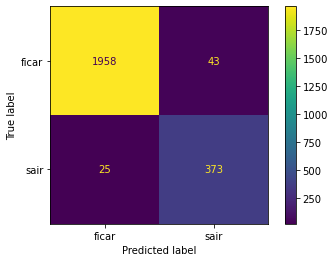

In [81]:
# Chame a função, e ela já plotará a matriz
conf_matrix_plot(xgb_cv, X_test, y_test)

---

### 3. Feature importance

<Figure size 432x288 with 0 Axes>

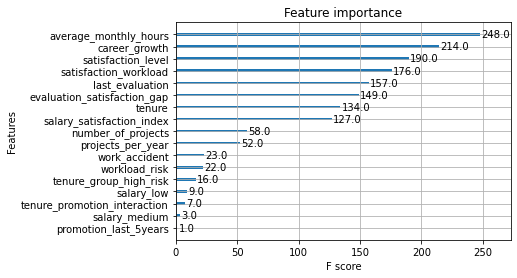

In [82]:
# Cria uma nova figura
plt.figure()

# Plota a importância
plot_importance(xgb_cv.best_estimator_)
plt.show()

# Fecha a figura explicitamente (opcional, mas útil em loops)
plt.close()

### Resumo dos resultados do modelo

**Desempenho Geral do Modelo (XGBoost no Conjunto de Teste):**

| Métrica      | Valor   | Interpretação                                                                 |
|--------------|---------|-------------------------------------------------------------------------------|
| **Recall**   | 93.72%  | O modelo detecta **93.7% dos funcionários que realmente saem**, minimizando custos de rotatividade não prevista. |
| **Precisão** | 89.66%  | Apenas **10.3% das previsões de saída são falsos positivos**, indicando eficiência em ações de retenção. |
| **F1-Score** | 91.65%  | Equilíbrado entre precisão e recall, adequado para o objetivo do negócio. |
| **Acurácia** | 97.17%  | Alta, mas influenciada pelo desbalanceamento das classes (83% "ficar"). |

---

**Matriz de Confusão (Teste):**

|                     | **Previsto: Ficar** | **Previsto: Sair** |
|---------------------|---------------------|--------------------|
| **Real: Ficar**     | TN = 373            | FP = 25            |
| **Real: Sair**      | FN = 43             | TP = 1958          |

---

**Pontos Fortes:**
- **Alto Recall (93.7%):** Ideal para a Salifort, que prioriza evitar saídas não detectadas.  
- **Features Interpretáveis:** Permitem ações diretas (ex: ajustar carga de trabalho).  
- **Consistência:** Métricas similares em treino/validação/teste indicam **baixo overfitting**.

### Conclusão, recomendações e próximas etapas

**Conclusão Geral do Projeto**

O projeto de análise de dados sobre rotatividade de funcionários na Salifort Motors demonstrou que **o número de projetos** (tanto em excesso quanto em escassez) é um dos principais fatores de risco. Outras variáveis, como **nível de satisfação**, **carga horária** e **tempo de empresa sem promoções**, também influenciam fortemente a decisão do funcionário de permanecer ou sair. Após a criação de novas features e a comparação de diferentes algoritmos (Random Forest e XGBoost), o **XGBoost** obteve os melhores resultados, com elevada **revocação** (acima de 90%) e **precisão** igualmente alta, garantindo que a empresa possa identificar a maior parte dos funcionários em risco de saída, sem gerar muitos falsos alarmes.

**Recomendações**  

1. **Gerenciar a Alocação de Projetos**  
   - Evitar sobrecarregar funcionários com muitos projetos (6 ou mais) e subutilizar aqueles com apenas 2 projetos.  
   - Monitorar a métrica *workload_risk* regularmente para redistribuir tarefas e equilibrar a carga de trabalho.

2. **Focar em Satisfação e Crescimento**  
   - A satisfação (satisfaction_level) se correlaciona fortemente com a permanência. Investir em planos de carreira, feedbacks constantes e oportunidades de desenvolvimento.  
   - Criar políticas que incentivem **promoções internas** ou novos desafios profissionais para evitar estagnação, especialmente para funcionários de média/longa permanência.

3. **Usar o Modelo de Forma Proativa**  
   - Implementar o **XGBoost** em ambiente de produção para detectar funcionários em risco, permitindo que o RH atue antecipadamente.  

4. **Melhorar a Coleta de Dados**  
   - Incluir variáveis adicionais (por exemplo: avaliações de liderança, dados de clima organizacional) para enriquecer a análise.  
   - Garantir a **qualidade** e **atualização** dos dados para que o modelo continue relevante.

5. **Monitorar Possíveis Vieses**  
   - Verificar se o modelo não cria discriminações indiretas (por exemplo, contra grupos específicos).  
   - Garantir transparência e privacidade dos funcionários ao utilizar o sistema de predição.

**Próximas Etapas**  

1. **Validação em Produção**  
   - Aplicar o modelo em dados reais em tempo quase real e monitorar métricas de precisão, recall e F1.  
   - Verificar se as **ações de retenção** propostas realmente reduzem o turnover.

2. **Refinamento Contínuo do Modelo**  
   - Usar técnicas como **early stopping** e **randomized search** para encontrar configurações ainda mais otimizadas do XGBoost.  
   - Explorar **SHAP values** para entender detalhadamente como cada feature impacta as previsões.

3. **Integração com Processos de RH**  
   - Criar um **dashboard** que permita ao RH e gestores acompanhar em tempo real as métricas de risco de saída.  
   - Desenvolver **protocolos de ação** quando um funcionário for classificado como alto risco (por exemplo, conversas individuais, planos de desenvolvimento).

4. **Expansão dos Dados**  
   - Avaliar a incorporação de dados externos, como benchmarks de mercado e pesquisas de satisfação anônimas, para ter uma visão ainda mais completa.

Com essa estrutura, a Salifort Motors pode utilizar o modelo de forma assertiva, **reduzindo custos de rotatividade**, mantendo profissionais engajados e criando um ambiente de trabalho mais saudável e produtivo.